# pyAp - ternary plot of apatite

pyAp has a built-in function `ApTernary.py` to plot F-Cl-OH ternary diagram for apatite.

Below we show an example of plotting F, OH, and Cl concentrations measured for apatite into a ternary diagram.

### 1. Import modules

import releavant modules.

In [1]:
import os, sys, numpy as np, matplotlib.pyplot as plt, pandas as pd, math
from pathlib import Path
# hack to allow scripts to be placed in subdirectories next to pyAp:
if not os.path.exists('pyAp') and os.path.exists('../pyAp'):
    sys.path.insert(1, os.path.abspath('..'))

from pyAp.ApStoic import stoi_
from pyAp import ApTernary

### 2. read data 

In [2]:
folder = Path(os.path.dirname(os.getcwd())+'/input/4ApThermo/')

data = pd.read_excel(folder / 'data.xlsx')

## choose oxygen number = 26 (for F- or Cl-apatite) or 25 (for OH-apatite)
results_stoi = stoi_(data,assume_oxy = 26) 
results_stoi

,SIO2,TIO2,AL2O3,FEO,CAO,MGO,MNO,K2O,NA2O,P2O5,SO3,CO2,F,CL,H2O,CE2O3,SRO,"stoi,(Ca/P-5/3)/(5/3)*100%",sample
0,0.017031,0.012811,0.020071,0.014243,9.852883,0.025391,0.014424,0.021725,0.033018,5.76717,0.025562,0.002325,0.694043,0.061986,0.243971,0.012469,0.009875,3.656599,Ap1
1,0.017031,0.012811,0.020071,0.014243,9.852883,0.025391,0.014424,0.021725,0.033018,5.76717,0.025562,0.002325,0.694043,0.061986,0.243971,0.012469,0.009875,3.656599,Ap2
2,0.017031,0.012811,0.020071,0.014243,9.852883,0.025391,0.014424,0.021725,0.033018,5.76717,0.025562,0.002325,0.694043,0.061986,0.243971,0.012469,0.009875,3.656599,Ap3


In [3]:
# the sum of XF + XCl + XOH should be 1
results_stoi['F'] + results_stoi['CL'] + results_stoi['H2O'] 

0    1.0
1    1.0
2    1.0
dtype: float64

### 3. Ternary plot
Choose the data you would like to plot in ternary diagram

If you have calculated F-Cl-OH mole fractions from lines above

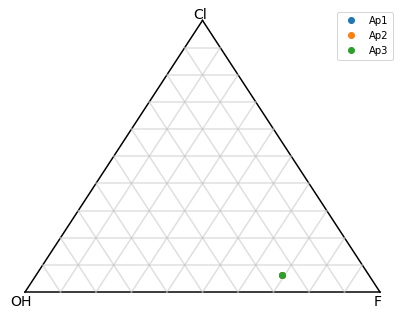

In [4]:
ApTernary.ternary(1)

for idx, value in results_stoi.iterrows():

    x_f = value['F']
    x_cl = value['CL']
    x = (x_f + x_cl/2) * 100
    y = x_cl*math.sqrt(3)*50

    if x > 100:
        x = 100
    if y > math.sqrt(3)*50:
        y = math.sqrt(3)*50
        
    plt.plot(x,y,'o',label=value['sample'])

plt.legend(loc='best')
plt.show()

Or you have known F-Cl-OH mole fractions and they are in excel file

In [5]:
df = pd.read_excel(folder / 'calc_water.xlsx')

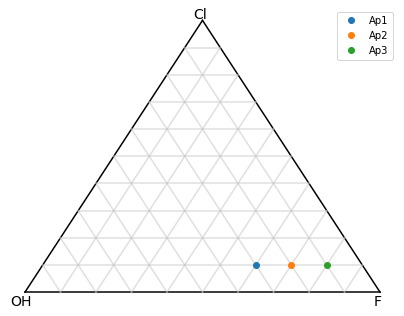

In [6]:
ApTernary.ternary(1)


for idx, value in df.iterrows():

    x_f = value['XF']
    x_cl = value['XCL']
    x = (x_f + x_cl/2) * 100
    y = x_cl*math.sqrt(3)*50

    if x > 100:
        x = 100
    if y > math.sqrt(3)*50:
        y = math.sqrt(3)*50
        
    plt.plot(x,y,'o',label=value['sample'])

plt.legend(loc='best')
plt.show()